<a href="https://colab.research.google.com/github/Rickyviii/M-RCNN-for-Kaggle-Cells-competition/blob/main/kaggle_competition_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Installations and imports

In [4]:
cd ./

/content


In [5]:
import os
if not os.path.exists('/content/drive/'):
    from google.colab import drive
    drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
ROOT_DIR = '/root'
ROOT_K_DIR = '/kaggle'
INPUT_DIR = '/content/drive/MyDrive/OC/P8'
WORKING_DIR = '/kaggle/working'

DATA_DIR = '/kaggle/working/DATA'
zip_competition_file_name = "sartorius-cell-instance-segmentation.zip"
AUTH_DIR = '/root/.kaggle'
AUTH_JSON_FILE = '/root/.kaggle/kaggle.json'

import os
#LOGS_DIR = os.path.join(WORKING_DIR, 'LOGS')
LOGS_DIR = os.path.join(INPUT_DIR, 'MODEL_LOGS')
DIR_MRCNN    = os.path.join (WORKING_DIR, "Mask_RCNN")
#DIR_MYFILES  = os.path.join (INPUT_DIR,   "custom-files-for-mrcnn")
DIR_MYFILES = INPUT_DIR
DIR_IMG_TRAINING = os.path.join (DATA_DIR,    "train")
DIR_IMG_TRAINING_RGB = os.path.join(DATA_DIR, 'train_RGB')

In [7]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


**Tensorflow downgrade**

In [8]:
!pip install tensorflow==2.3.0
!pip install keras==2.4.3

     |████████████████████████████████| 320.4 MB 14 kB/s 
     |████████████████████████████████| 459 kB 72.9 MB/s 
     |████████████████████████████████| 20.1 MB 290 kB/s 
     |████████████████████████████████| 2.9 MB 47.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
 

  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0


In [9]:
import tensorflow
print(tensorflow.__version__)  #check it is V2.3

2.3.0


In [10]:
tensorflow.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

**Kaggle upgrade and authentication file move**

In [11]:
import os, shutil
# place kaggle authentication json file
if not os.path.exists(AUTH_JSON_FILE):
    if not os.path.exists(ROOT_DIR): os.mkdir(ROOT_DIR) #/root
    if not os.path.exists(AUTH_DIR): os.mkdir(AUTH_DIR) #/root/.kaggle
    print ('Copying kaggle.json file')
    shutil.copy(os.path.join(INPUT_DIR, 'kaggle.json'), AUTH_JSON_FILE)
    os.chmod (AUTH_JSON_FILE, 600)     #change rights
    if os.path.exists(AUTH_JSON_FILE): print('file copied')

Copying kaggle.json file
file copied


In [12]:
!pip uninstall -y kaggle
!pip install kaggle==1.5.12
!kaggle -v

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 58 kB 4.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=bb037b2d8fc6386ab94f36b0f80ef14567052d55c30563b8891501d18ad906de
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
Kaggle API 1.5.12


In [13]:
!kaggle --version

Kaggle API 1.5.12


In [14]:
#os.chdir(DIR_MYFILES)
#if not 'REQUIREMENTS_DOWNLOADED' in globals():
    #!pip3 install -r requirements.txt #requirements for mrcnn code to work. Force TensorFlow version so 2.3
    #REQUIREMENTS_DOWNLOADED = True #only do this once


In [15]:
!pip install git+https://github.com/aleju/imgaug.git  #image augmentation

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-tm_fho8s
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-tm_fho8s
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=971122 sha256=5aec0d20a3f086c07f2071a43875a13b27fce99dba8fbb9c18793a2c2a93ea6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-fpcznqbx/wheels/0c/78/b5/9303fae9d5e03df1f319adfe4e6534180b5c3232de11bc9a2f
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.4.0 which is incompatible.


**Libraries import**

In [16]:
import os, shutil, time
import imgaug
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# I. Extracting data

In [17]:
if not os.path.exists(ROOT_K_DIR):  os.mkdir(ROOT_K_DIR)
if not os.path.exists(WORKING_DIR): os.mkdir(WORKING_DIR)

In [18]:
#Empty WORKING DIR
for f in os.listdir(WORKING_DIR):
    if os.path.isfile(os.path.join(WORKING_DIR, f)):
        os.remove(os.path.join(WORKING_DIR, f))

In [19]:
os.path.exists(AUTH_DIR)

True

In [20]:
# upload zip competition file to working_dir directory
os.chdir(os.path.join(WORKING_DIR))
if not os.path.exists(os.path.join(WORKING_DIR, zip_competition_file_name)):
    print ('downloading competition zip file')
    !kaggle competitions download -c sartorius-cell-instance-segmentation

# extract zip file to input directory
from zipfile import ZipFile
print ('extracting competition zip file to KAGGLE WORKING directory')

st = time.time()
t = st
while t < 30 and not os.path.exists(os.path.join(WORKING_DIR, zip_competition_file_name)):
    time.sleep(2) #on teste toutes les 2 secondes jusqu'à ce que le dossier soit visible
    t = time.time() - st
    print(t)

if os.path.exists(os.path.join(WORKING_DIR, zip_competition_file_name)):
    with ZipFile(os.path.join(WORKING_DIR, zip_competition_file_name), 'r') as zip_file: 
        print('extracting zip_file')
        if not os.path.exists(os.path.join(WORKING_DIR, 'DATA' )): os.mkdir(os.path.join(WORKING_DIR, 'DATA' ))
        zip_file.extractall(os.path.join(WORKING_DIR, 'DATA'))
    print('done')
else: print('FAILURE', "[Errno 2] No such file or directory: '/kaggle/working/sartorius-cell-instance-segmentation.zip'")

if os.path.exists(os.path.join(WORKING_DIR, zip_competition_file_name)): 
    os.remove(os.path.join(WORKING_DIR, zip_competition_file_name))
    print('zip file removed')

downloading competition zip file
100% 2.30G/2.31G [00:32<00:00, 84.0MB/s]
100% 2.31G/2.31G [00:32<00:00, 75.4MB/s]
extracting competition zip file to KAGGLE WORKING directory
extracting zip_file
done
zip file removed


**Transforming grayscale images into RGB grey images**

In [21]:
if not os.path.exists(DIR_IMG_TRAINING_RGB): os.mkdir(DIR_IMG_TRAINING_RGB)
#transform_img_RGB(os.path.join(DATA_DIR, 'train', '0030fd0e6378.png'))
x=0
for f in os.listdir(DIR_IMG_TRAINING):
    if os.path.isfile(os.path.join(DIR_IMG_TRAINING, f)):
        with Image.open(os.path.join(DIR_IMG_TRAINING, f)) as img:
            if img.getbands() == ('L',) and not os.path.exists(os.path.join(DIR_IMG_TRAINING_RGB, f)): 
                img0 = img.convert ('RGB')
                img0.save(os.path.join(DIR_IMG_TRAINING_RGB, f))
    if os.path.exists(os.path.join(DIR_IMG_TRAINING_RGB, f)):
        x=x+1

print(x, 'images converted to RGB and moved to train_RGB folder')

606 images converted to RGB and moved to train_RGB folder


# II. Extracting data and quick visualization

In [22]:
train_csv = pd.read_csv (os.path.join(WORKING_DIR , 'DATA', 'train.csv'))

In [23]:
train_csv.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [24]:
#cells type
LIST_CELLS_TYPE = train_csv.cell_type.unique().tolist()
train_csv.cell_type.unique(), train_csv.width.unique(), train_csv.height.unique()

(array(['shsy5y', 'astro', 'cort'], dtype=object), array([704]), array([520]))

In [25]:
WIDTH = train_csv.width.unique()[0]
HEIGHT = train_csv.height.unique()[0]
print('Images width: ', WIDTH)
print('Images height: ', HEIGHT)

Images width:  704
Images height:  520


In [26]:
sample_submission_csv = pd.read_csv (os.path.join(WORKING_DIR , 'DATA', 'sample_submission.csv'))
sample_submission_csv

,id,predicted
0,7ae19de7bc2a,NaN
1,d48ec7815252,NaN
2,d8bfd1dafdc4,NaN


In [27]:
#how many files
NB_TRAIN_IMG     = len(os.listdir(os.path.join(WORKING_DIR, 'DATA', 'train')))
NB_TEST_IMG      = len(os.listdir(os.path.join(WORKING_DIR, 'DATA', 'test')))
NB_SEMI_SUP_IMG  = len(os.listdir(os.path.join(WORKING_DIR, 'DATA', 'train_semi_supervised')))
print('number of training image files:', NB_TRAIN_IMG)
print('number of test image files:', NB_TEST_IMG)
print('number of semi supervised image files:', NB_SEMI_SUP_IMG)

number of training image files: 606
number of test image files: 3
number of semi supervised image files: 1972


**Distributions**

Can an image id have different cell types ? <br>
--> No :

In [28]:
train_img_celltype = train_csv.groupby(['id','cell_type']).count().reset_index()[['id', 'cell_type']]
print('Count of cell types per image:', train_img_celltype.groupby('id').count().cell_type.unique())

train_img_celltype.groupby('id').count().head()

Count of cell types per image: [1]


,cell_type
id,
0030fd0e6378,1
0140b3c8f445,1
01ae5a43a2ab,1
026b3c2c4b32,1
029e5b3b89c7,1


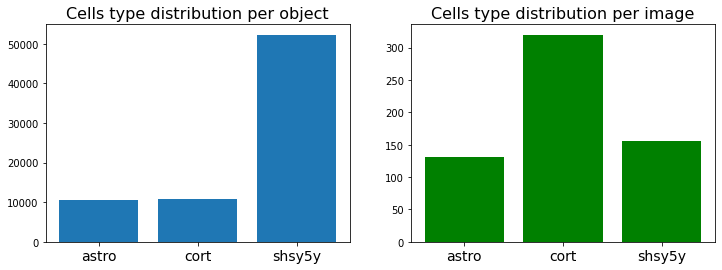

In [46]:
df_count = train_csv.groupby('cell_type').count()  
#all masks cell_type distribution
df_count_img = train_img_celltype.groupby('cell_type').count()
#we want the cell type distribution per image

fig, _ = plt.subplots(1,2)
fig.set_size_inches(12,4)
ax = plt.subplot(121)
plt.bar(df_count.index, df_count['id']);
ax.set_title('Cells type distribution per object', size = 16)
#ax.set_xlabel('cell type', size = 14)
ax.set_xticklabels(df_count.index, size = 14)

ax = plt.subplot(122)
plt.bar(df_count_img.index, df_count_img['id'], color = 'green')
#ax.set_xlabel('cell type', size = 14)
ax.set_title('Cells type distribution per image', size = 16)
ax.set_xticklabels(df_count.index, size = 14);

In [44]:
df_count.index

Index(['astro', 'cort', 'shsy5y'], dtype='object', name='cell_type')

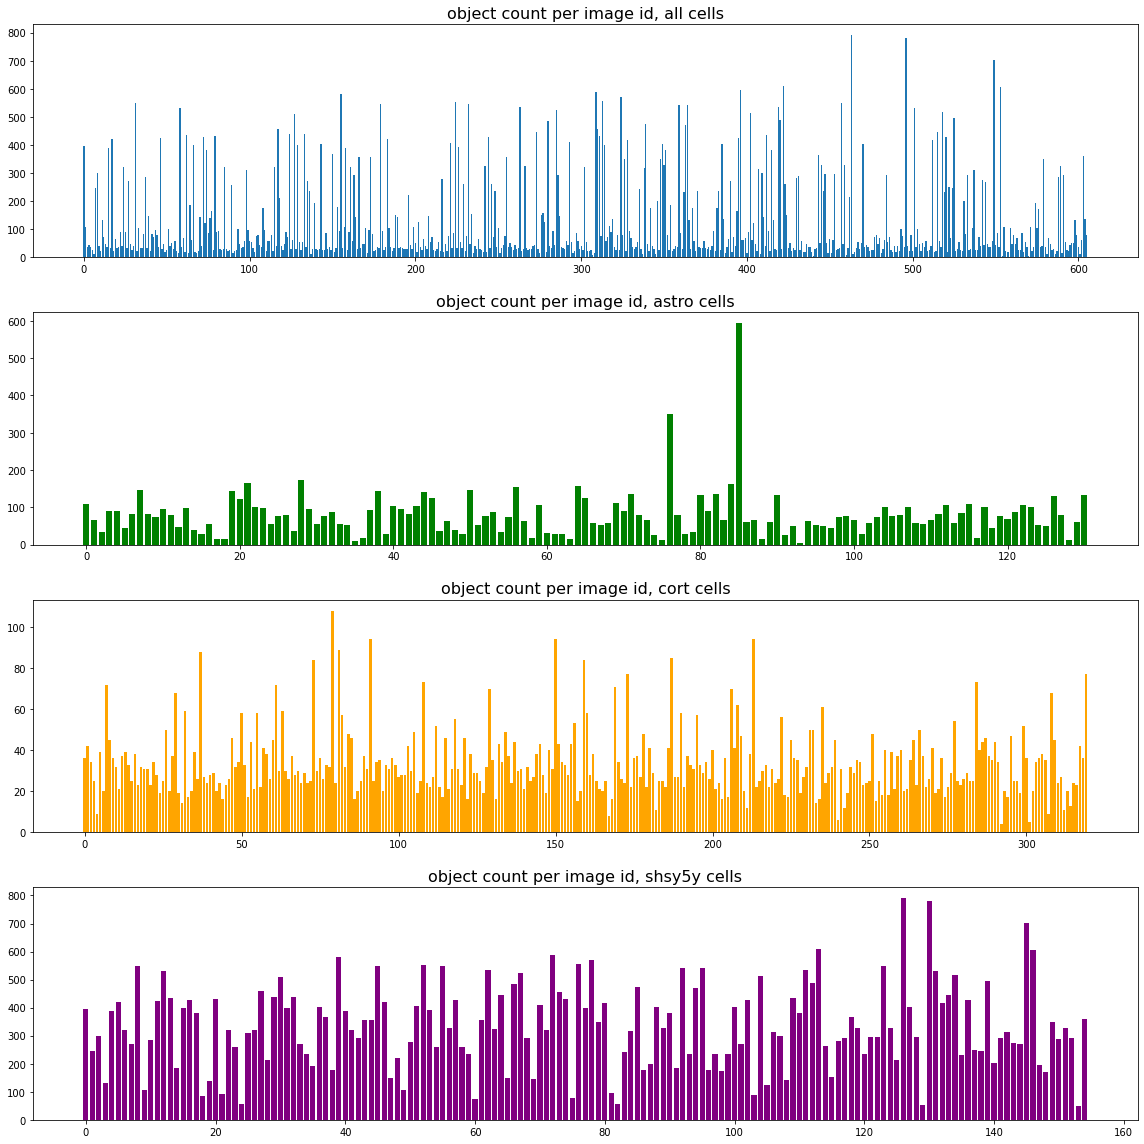

In [30]:
df_count = train_csv.groupby('id').count().reset_index()  #all 606 images, how many objects
X, Y     = df_count.index, df_count['annotation']
df_count_t1 = train_csv.query("cell_type=='astro'").groupby('id').count().reset_index()  #all 606 images, filtered on cell_type 1
X1, Y1   = df_count_t1.index, df_count_t1['annotation']
df_count_t2 = train_csv.query("cell_type=='cort'").groupby('id').count().reset_index()  #all 606 images, filtered on cell_type 2
X2, Y2   = df_count_t2.index, df_count_t2['annotation']
df_count_t3 = train_csv.query("cell_type=='shsy5y'").groupby('id').count().reset_index()  #all 606 images, filtered on cell_type 3
X3, Y3   = df_count_t3.index,  df_count_t3['annotation']

fig, _ = plt.subplots(4,1)
fig.set_size_inches (16,16)
plt.subplot(411)
plt.bar(X,Y);
plt.title('object count per image id, all cells', size = 16);
plt.subplot(412)
plt.bar(X1,Y1, color = 'green');
plt.title('object count per image id, astro cells', size = 16);
plt.subplot(413)
plt.bar(X2,Y2, color = "orange")
plt.title('object count per image id, cort cells', size = 16);
plt.subplot(414)
plt.bar(X3,Y3, color = 'purple')
plt.title('object count per image id, shsy5y cells', size = 16);
plt.tight_layout(h_pad = 2)

In [51]:
train_csv.groupby('id').count().cell_type.mean()

121.42739273927393

In [52]:
train_csv.query('cell_type == "astro"').groupby('id').count().cell_type.mean(), \
train_csv.query('cell_type == "cort"').groupby('id').count().cell_type.mean(), \
train_csv.query('cell_type == "shsy5y"').groupby('id').count().cell_type.mean()

(80.3206106870229, 33.678125, 337.3290322580645)

In [66]:
df_ct_mean = train_csv.groupby(['id','cell_type']).count().reset_index().groupby('cell_type').agg(Mean_per_image = ('annotation', 'mean'))
df_ct_mean

,Mean_per_image
cell_type,
astro,80.320611
cort,33.678125
shsy5y,337.329032


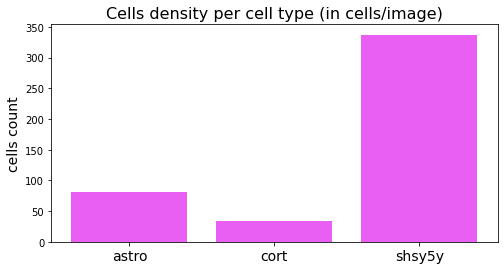

In [81]:
fig = plt.figure(figsize = (8,4))

plt.bar(df_ct_mean.index, df_ct_mean.Mean_per_image, color = "#ea5ff3")
ax = plt.gca()
ax.set_ylabel ("cells count", size = 14)
ax.set_xticklabels (df_ct_mean.index, size = 14)
ax.set_title('Cells density per cell type (in cells/image)', size =  16);

**Mask visualization**

Functions

In [36]:
def rle_decode(mask_rle, shape = [HEIGHT, WIDTH], color=1): #imported from other kaggle notebook
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    if isinstance(mask_rle, list):s = mask_rle #already a list
    else: s = mask_rle.split() #transform into list
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], 
                                                          s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
    return img.reshape(shape)
    #return bitmap array of shape 'shape'

def rle_decode_multimasks(masks_rle_list, shape = [HEIGHT, WIDTH], color=-1): #to print various masks of a whole image
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    img = np.zeros(shape[0] * shape[1], dtype=np.float32)
    
    for m, mask_rle in enumerate(masks_rle_list):
        if isinstance(mask_rle, list):s = mask_rle #already a list
        else: s = mask_rle.split() #transform into list
        
        starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], 
                                                              s[1:][::2])]
        starts -= 1
        ends = starts + lengths
    
        for lo, hi in zip(starts, ends):
            if color != -1: img[lo : hi] = color
            else: img[lo : hi] = m+1
        
    return img.reshape(shape)

In [32]:
def show_random_cells_and_masks():
    annotations = []
    IMG_PATH = []

    fig, _ = plt.subplots(2,3)
    fig.set_size_inches(16,8)

    for j,c in enumerate(LIST_CELLS_TYPE):
        df_ct = train_csv.query("cell_type == '" + c + "'")
        List_img_ids = df_ct.groupby('id').count().index.tolist()
        Nb_img = len(List_img_ids)
        r = np.random.choice(range(Nb_img)) #random id 
        img_id = List_img_ids[r]
        IMG_PATH.append(os.path.join(DIR_IMG_TRAINING, img_id + '.png'))

        if os.path.exists(IMG_PATH[j]):
            #print(IMG_PATH[j])
            df_masks = train_csv.query("id == '" + img_id + "'")
            Nb_obj = df_masks.shape[0]
            print('cell_type: ',c, '_', IMG_PATH[j], '_ img n°', r, '_ img_id = ', img_id, '_ NB_masks:', Nb_obj)
            annotations.append (df_masks.annotation.tolist())
            plt.subplot(2, 3, j + 1)
            plt.imshow(Image.open(IMG_PATH[j]), cmap = 'hot')
            plt.title ('original image _ cell type ' + c, size=16)
            plt.subplot(2, 3, j + 4)
            mask = rle_decode_multimasks(annotations[j]).astype('uint16')
            img0 = Image.fromarray(mask)
            plt.title ('masks _ cell type ' + c, size=16)
            plt.imshow(img0, cmap = 'viridis')
    print()
    plt.tight_layout(h_pad = 2, w_pad = 2);

Graphics

cell_type:  shsy5y _ /kaggle/working/DATA/train/8bcc2ef2e81e.png _ img n° 84 _ img_id =  8bcc2ef2e81e _ NB_masks: 316
cell_type:  astro _ /kaggle/working/DATA/train/29dfe87f3a44.png _ img n° 26 _ img_id =  29dfe87f3a44 _ NB_masks: 80
cell_type:  cort _ /kaggle/working/DATA/train/44752904b4d5.png _ img n° 80 _ img_id =  44752904b4d5 _ NB_masks: 24



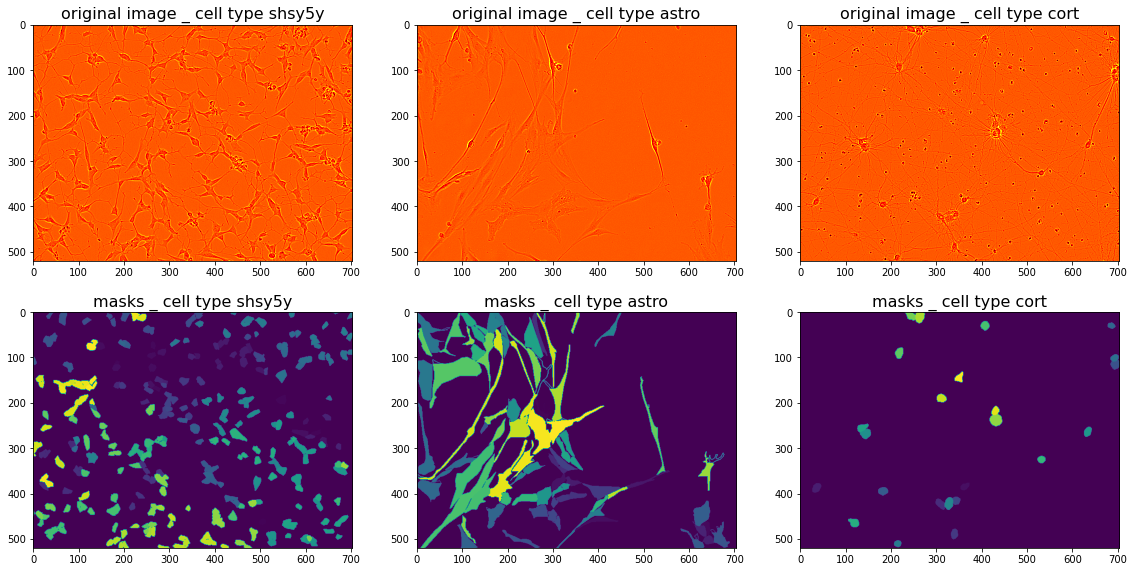

In [33]:
#random image for each cell type
show_random_cells_and_masks()

In [82]:
train_csv.sample(5)

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
4733,11c2e4fcac6d,105373 5 106077 5 106781 5 107485 5 108189 5 1...,704,520,astro,09h00m00s,2020-09-14,astros[cereb]_D9-3_Vessel-361_Ph_4,0 days 09:00:00
20259,46b08b7eee99,223697 2 224398 6 225100 9 225804 10 226508 10...,704,520,cort,13h30m00s,2020-11-01,cort[pre-treat]_A4-4_Vessel-377_Ph_1,0 days 13:30:00
6140,1974fbb27dcf,117935 1 118638 3 119341 4 120044 6 120747 8 1...,704,520,shsy5y,11h30m00s,2019-06-15,shsy5y[diff]_D9-2_Vessel-714_Ph_3,0 days 11:30:00
29871,6d9c64988769,303189 2 303892 5 304594 8 305297 9 306000 11 ...,704,520,shsy5y,11h30m00s,2019-06-14,shsy5y[diff]_D11-2_Vessel-714_Ph_4,0 days 11:30:00
66136,e103a3e85a46,275073 2 275774 5 276476 7 277178 9 277875 15 ...,704,520,shsy5y,11h30m00s,2019-06-14,shsy5y[diff]_D1-4_Vessel-714_Ph_1,0 days 11:30:00


# III. First M-RCNN attempt: COCO model re-trained on top layers

## III.1 M-RCNN import

In [83]:
#getting mask RCNN file from Leekunhee version, which is a TensorFlow V2.3 compatible version of Mattersport M-RCNN version ()
os.chdir(WORKING_DIR)
if not os.path.exists(DIR_MRCNN):
     !git clone https://github.com/leekunhee/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 983, done.
remote: Total 983 (delta 0), reused 0 (delta 0), pack-reused 983
Receiving objects: 100% (983/983), 136.82 MiB | 29.02 MiB/s, done.
Resolving deltas: 100% (580/580), done.


In [84]:
#os.chdir(DIR_MRCNN)
#if not 'SETUP_DONE' in globals():
    #!python3 setup.py install
    #SETUP_DONE = True

In [85]:
#replace model.py by same file except focing workers to 1 
#necessary when training the model (no multi processing, as it generates a bug)
source = os.path.join(DIR_MYFILES, 'model.py')
dest =   os.path.join(DIR_MRCNN, 'mrcnn', 'model.py') 
shutil.copy(source, dest) #force workers to 1, no multi processing

'/kaggle/working/Mask_RCNN/mrcnn/model.py'

In [86]:
os.listdir(os.path.join(WORKING_DIR, "Mask_RCNN/mrcnn"))

['config.py',
 'utils.py',
 'visualize.py',
 'model.py',
 'parallel_model.py',
 '__init__.py']



## III.2 Classes and functions

In [87]:
CELL_CLASS_NAMES = ["BG", "shsy5y", "astro",  "cort"]

**Create val and train subsets of train_csv with attempt of stratification**

In [88]:
def append_annot(x):
    #if not isinstance(x, list): x = [x] #rle_decode(x, shape, color=1)
    #if not isinstance(y, list): y = [y] #rle_decode(y, shape, color=1)
    return x.tolist()

def encode_list_masks(x):
    m_encode = []
    if not isinstance(x, list): 
        print('ERROR')
        return []
    for m in x:
        m_encode.append(rle_decode(m, (HEIGHT, WIDTH), color=1))
    return m_encode

In [89]:
#create df_img, df_img_train, df_img_val
def create_img_subsets(subset, training_df = train_csv, ratio = 0.8, list_classes = CELL_CLASS_NAMES):
    df_img = training_df[['id', 'cell_type', 'annotation']].groupby(['id', 'cell_type']) \
        .aggregate(func = lambda x: append_annot(x)).reset_index()
    #create subsets per cell_type, ratio = 0.2 val, 0.8 train
    df_img_subset = pd.DataFrame(columns = df_img.columns) #init
    
    for j in range(1, len(list_classes)):
        CT = list_classes[j]
        df_cell_filtered = df_img.query("cell_type =='" + CT + "'").reset_index(drop=True) #filter on specific cell_type
        t = np.ceil(df_cell_filtered.shape[0] * ratio).astype('int') #integer, 80%
        if subset == 'train':
            df_img_subset = pd.concat([df_img_subset, df_cell_filtered.loc[range(t),:]]) #we concatenate L first rows(80%) to df_train
        else:       #subset =='val'
            df_img_subset = pd.concat([df_img_subset, df_cell_filtered.loc[t:,:]]) #we concatenate the rest (20%) to df_val
    df_img_subset = df_img_subset.reset_index(drop = True)
    return [df_img, df_img_subset]

In [90]:
import sys
sys.path.append(DIR_MRCNN)  # To find local version of the library
import mrcnn
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model #module mrcnn/model.py

In [91]:
class CellConfig(Config):
    """Configuration for training on the paper  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "CELLS"

    # NUMBER OF GPUs to use. When using only a CPU, this needs to be set to 1.
    GPU_COUNT = 1

    # Number of images to train with on each GPU. A 12GB GPU can typically
    # handle 2 images of 1024x1024px.
    # Adjust based on your GPU memory and image sizes. Use the highest
    # number that your GPU can handle for best performance.
    IMAGES_PER_GPU = 2
    #IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = len(CELL_CLASS_NAMES)  # Background + Paper + Plastic + Otherwaste

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 800
    # Max number of final detections
    DETECTION_MAX_INSTANCES = 800

    # Minimum probability value to accept a detected instance
    # ROIs below this threshold are skipped
    DETECTION_MIN_CONFIDENCE = 0.5

    # Learning rate and momentum
    # The Mask RCNN paper uses lr=0.02, but on TensorFlow it causes
    # weights to explode. Likely due to differences in optimizer
    # implementation.
    LEARNING_RATE = 1e-4
    LEARNING_MOMENTUM = 0.9

class CellDataset(utils.Dataset):

    def add_classes(self, list_classes = CELL_CLASS_NAMES):
        for j in range(1, len(list_classes)):
            self.add_class("CELLS", j, list_classes[j])  #create all new classes: source / class_id / class_name
    
    def load_cells(self, subset, list_classes = CELL_CLASS_NAMES): #return image_info variable, subset = 'train' or 'val'
        """Load a subset of the Cell dataset : training or validation
        dataset_dir: Root directory of the dataset.
        """
        assert subset in ["train", "val"]
        
        # Add classes.
        # def add_class(self, source, class_id, class_name):
        self.add_classes()
        # Load annotations and img dataframe  for train or val subset
        df_img_subset = create_img_subsets(subset = subset, training_df = train_csv, ratio = 0.8, list_classes = list_classes)[1]
        
        for i in df_img_subset.index: #update IMAGE_INFO
            self.add_image(source = "CELLS",         
                           #def add_image(self, source, image_id, path, **kwargs): 
                               #image_info_.update(**kwargs), 
                               #self.image_info.append(image_info)
                image_id = df_img_subset.loc[i, 'id'],        
                path   = os.path.join(DIR_IMG_TRAINING_RGB, df_img_subset.loc[i, 'id'] + '.png'),  #image fullpath
                width  = WIDTH, 
                height = HEIGHT,
                annotations = df_img_subset.loc[i, 'annotation'], 
                NB_instances = len(df_img_subset.loc[i, 'annotation']),
                class_ = df_img_subset.loc[i, 'cell_type']
                )
        print (len(self.image_info))
        
    def load_mask(self, image_number, list_classes = CELL_CLASS_NAMES):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        img_info = self.image_info[image_number]
        
        # Convert LRE to a bitmap mask of shape [height, width, instance_count]
        mask = np.zeros([img_info["height"], img_info["width"], img_info["NB_instances"]], 
                        dtype=np.uint8) #init = all black for each instance
        
        for i, mask_rle in enumerate(img_info["annotations"]): # i = n° of object, one mask per object
            mask[:,:,i] = rle_decode(mask_rle, (HEIGHT, WIDTH), color=1)

        # class
        print('img_id', img_info['id'], 'nb_instances', img_info["NB_instances"],
              'class', img_info['class_'], 'image path', img_info['path'])

        cat_num = []
        for c in range (img_info["NB_instances"]):
            cat_num.append(list_classes.index(img_info['class_'])) 
        # Always same cell type id
        # Return mask, and array of class IDs of each instance. 

        return mask, np.array(cat_num) 

In [92]:
def train_cell(that_model, class_config, data_aug = False):    #'that_model' has MaskRCNN class
    """Train the model."""
    # Training dataset.
    dataset_train = CellDataset()
    dataset_train.load_cells("train")
    dataset_train.prepare()

    # Validation dataset
    dataset_val = CellDataset()
    dataset_val.load_cells("val")
    dataset_val.prepare()

    #training
    if data_aug:
        that_model.train(dataset_train, dataset_val,         #from model.py, MaskRCNN class 
            learning_rate=class_config.LEARNING_RATE,
            epochs=30,
            layers='heads',
            augmentation = imgaug.augmenters.OneOf([
                    imgaug.augmenters.Fliplr(0.5),
                    imgaug.augmenters.Flipud(0.5),
                    imgaug.augmenters.Affine(rotate=(-90, 90))]))
    else:
        that_model.train(dataset_train, dataset_val,         #from model.py, MaskRCNN class 
            learning_rate=class_config.LEARNING_RATE,
            epochs=30,
            layers='heads')

In [93]:
test_ = CellDataset()
test_.load_cells('train')

485


img_id c8607b0581bf nb_instances 34 class cort image path /kaggle/working/DATA/train_RGB/c8607b0581bf.png


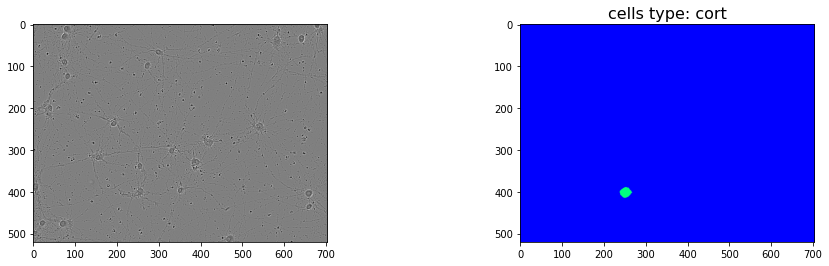

In [94]:
x = np.random.choice(len(test_.image_info))
#test_.image_info[1]
mask, class_ids = test_.load_mask(x)
nb_obj = test_.image_info[x]['NB_instances']
obj_random = np.random.choice(nb_obj)
m = mask[:,:,obj_random]
img0 = Image.fromarray(m)

fig, _ = plt.subplots(2,1)
fig.set_size_inches(16,4)
plt.subplot(121)
plt.imshow(Image.open(test_.image_info[x]['path']), cmap='bone')
plt.subplot(122)
plt.imshow(img0, cmap='winter')
plt.title('cells type: ' + CELL_CLASS_NAMES[class_ids[0]], size=16);

## III.3 Model training

In [ ]:
if not os.path.exists(LOGS_DIR): os.mkdir(LOGS_DIR)
#load original trained model
COCO_MODEL_PATH = os.path.join(DIR_MRCNN, "mask_rcnn_coco.h5")
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH) #download model

#define my_model for training    
Cconfig = CellConfig()
my_model =  mrcnn.model.MaskRCNN(mode="training", 
                                config=Cconfig,
                                model_dir = LOGS_DIR)  #class MaskRCNN for mrcnn/model.py

# Exclude the last layers because they require a matching number of classes
my_model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"]) #exclude: list of layer names to exclude

In [ ]:
'''
2021-11-10 20:11:45.851696: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-11-10 20:11:45.852005: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcublas.so.10'; dlerror: libcublas.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-11-10 20:11:45.935289: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcusparse.so.10'; dlerror: libcusparse.so.10: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2021-11-10 20:11:45.935586: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudnn.so.7'; dlerror: libcudnn.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
'''

In [ ]:
st = time.time()

Cconfig = CellConfig()
CDataset = CellDataset()

train_cell(my_model, Cconfig)
print((time.time() - st)/3600, 'h')

IAU calcul: https://www.kaggle.com/theoviel/competition-metric-map-iou

## III.4 Model loading in inference mode

In [98]:
#return last weights saved in last model trained


def find_weights_file(base_name, save_dir):
    LM=0
    for dir_n in os.listdir(save_dir):
        dirPath = os.path.join(save_dir, dir_n)
        if os.path.isdir(dirPath):
            #print (dir_n)
            if dir_n[:len(base_name)] == base_name:
                dirStatsObj = os.stat ( dirPath )
                modificationTime = dirStatsObj.st_mtime
                #print(LM, modificationTime)
                if modificationTime > LM: 
                    LM = modificationTime
                    DIR_MODEL_H5_name = dir_n
                #print("Last Modified Time : ", modificationTime )
    DIR_MODEL_H5 = os.path.join(save_dir, DIR_MODEL_H5_name)

    LM_=0
    for file_n in os.listdir(DIR_MODEL_H5):
        filePath = os.path.join(DIR_MODEL_H5, file_n)
        if os.path.isfile(filePath):
            if file_n[-3:] == '.h5':           
                fileStatsObj = os.stat ( filePath )
                modificationTime = fileStatsObj.st_mtime
                if modificationTime > LM_: 
                    LM_ = modificationTime
                    MODEL_H5_name = file_n

    return os.path.join(DIR_MODEL_H5, MODEL_H5_name)


In [99]:
Cconfig = CellConfig()
MODEL_H5 = find_weights_file(Cconfig.NAME.lower(), LOGS_DIR)
MODEL_H5, os.path.exists(MODEL_H5)

('/content/drive/MyDrive/OC/P8/MODEL_LOGS/cells20211111T1909/mask_rcnn_cells_0028.h5',
 True)

In [100]:
# Create model object for inference mode, with weights loaded from last model trained.
class CellInferenceConfig(Config): #module coco.py, Class CocoConfig
    NAME = 'CELLS_INFERENCE'
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = len(CELL_CLASS_NAMES)  # Background + Paper + Plastic + Otherwaste
    STEPS_PER_EPOCH = 100
    MAX_GT_INSTANCES = 800
    DETECTION_MAX_INSTANCES = 800
    DETECTION_MIN_CONFIDENCE = 0.5
    LEARNING_RATE = 1e-4
    LEARNING_MOMENTUM = 0.9

CellconfigInf = CellInferenceConfig()
CellconfigInf.display()

my_model_inf0 = mrcnn.model.MaskRCNN(mode="inference", 
                                config=CellconfigInf,
                                model_dir = LOGS_DIR)

# Load weights trained on MS-COCO
my_model_inf0.load_weights(MODEL_H5, by_name=True)                              


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        800
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                16
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.0001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE        

# III.5 How to calculate the metric expected

In [50]:
#metrics functions 
#to compute the score as requested per kaggle competition rules

In [95]:
#retrieved from 
#https://www.kaggle.com/theoviel/competition-metric-map-iou/notebook

def compute_iou(y_true, y_pred):
    """
    Computes the IoU for instance labels and predictions.

    Args:
        y_true (np array): true masks, 
        y_pred (np array): predictions masks
        the arrays contain the segmented pixels where each instance 
        has one value associated (pixel = 0 or m, m = instance number),
        and 0 is the background.

    Returns:
        np array: IoU matrix, of size Nb_true_instances x Nb_pred_instances.
    """

    Nb_true_instances = len(np.unique(y_true))
    Nb_pred_instances = len(np.unique(y_pred))

    # Compute intersection between all objects
    intersection = np.histogram2d(
        y_true.flatten(), y_pred.flatten(), 
        bins=(Nb_true_instances, Nb_pred_instances))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(y_true, bins=Nb_true_instances)[0]
    area_pred = np.histogram(y_pred, bins=Nb_pred_instances)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection
    iou = intersection / union
    
    return iou[1:, 1:]  # exclude background

def precision_at(threshold, iou):
    """
    Computes the precision at a given threshold.

    Args:
        threshold (float): Threshold.
        iou (np array): IoU matrix.

    Returns:
        int: Number of true positives,
        int: Number of false positives,
        int: Number of false negatives.
    """
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1)  == 1  # Correct objects
    false_positives = np.sum(matches, axis=0) == 0  # Missed objects
    false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
    tp, fp, fn = (
        np.sum(true_positives),
        np.sum(false_positives),
        np.sum(false_negatives),
    )
    return tp, fp, fn

def iou_map(truths, preds, verbose=0):
    """
    Computes the metric for the competition.
    Masks contain the segmented pixels where each object has one value associated,
    and 0 is the background.

    Args:
        truths (list of merged masks, one merged mask per image): Ground truths.
        preds (list of merged masks, one merged mask per image): Predictions.
        verbose (int, optional): Whether to print infos. Defaults to 0.

    Returns:
        float: mAP.
    """
    ious = [compute_iou(truth, pred) for truth, pred in zip(truths, preds)]

    if verbose:
        print("Thresh\tTP\tFP\tFN\tPrec.")

    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        tps, fps, fns = 0, 0, 0
        for iou in ious:
            tp, fp, fn = precision_at(t, iou)
            tps += tp
            fps += fp
            fns += fn

        p = tps / (tps + fps + fns)
        prec.append(p)

        if verbose:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tps, fps, fns, p))

    if verbose:
        print("Average Precision (AP)")
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))

    return np.mean(prec)

## III.5B Remove overlapping

In [102]:
def remove_overlapping_pixels(mask, other_masks):
    
    for other_mask in other_masks:
        other_mask = other_mask.astype('uint16')
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            mask[np.logical_and(mask, other_mask)] = 0
    mask = mask.astype('uint16')
    return mask


In [103]:
A=np.array(
    [[6,5,0],
     [5,6,7],
     [2,1,0]])

B = np.array(
    [[0,3,1],
     [1,3,1],
     [0,0,1]])

C = np.array(
    [[0,3,1],
     [1,3,1],
     [0,0,1]])


D = remove_overlapping_pixels(A, [B, C])
D

array([[6, 0, 0],
       [0, 0, 0],
       [2, 1, 0]], dtype=uint16)

In [373]:
remove_overlapping_pixels(D, [B, C])

array([[6, 0, 0],
       [0, 0, 0],
       [2, 1, 0]], dtype=uint16)

In [104]:
def remove_overlapping(array_pred_masks): 
    #array of size Height x Width x Nb_instances
    array_pred_masks=array_pred_masks.astype('uint16')
 
    #array_pred_masks=results[0]['masks']
    h, w, Nb_inst = array_pred_masks.shape

    list_m = []
    for j in range(Nb_inst):
        list_m.append(array_pred_masks[:,:,j])

    list_output = [list_m[0]]

    for m, mask in enumerate(list_m):
        if m>0: 
            list_output.append(remove_overlapping_pixels(mask, 
                                                         list_output[0:m]))
            
    array_pred_masks_o = np.zeros([h, w, Nb_inst])
    for j in range(Nb_inst):
        array_pred_masks_o[:, :, j] = list_output[j]

    return array_pred_masks_o.astype('uint16')

## III.6 Tests

In [105]:
from mrcnn import visualize
df_img, df_train = create_img_subsets('train', training_df = train_csv, 
                            ratio = 0.8, list_classes = CELL_CLASS_NAMES)
_, df_val = create_img_subsets('val', training_df = train_csv, 
                            ratio = 0.8, list_classes = CELL_CLASS_NAMES)

In [106]:
#generate and get input info from random image in train or val set
def generate_random_image(df_img, df_train, df_val, 
                          subset = '', cell_type = ''):
    #from train or val dataset
    #input elements
    if subset=='train': df=df_train
    elif subset == 'val': df = df_val
    else: df = df_img
    if cell_type != '':
        df = df.query("cell_type=='{}'".format(cell_type)).reset_index(
                                                            drop = True)

    random_index = np.random.choice(df.shape[0])
    img_id = df.loc[random_index, 'id']
    img_name = img_id + '.png'
    image = Image.open(os.path.join(DIR_IMG_TRAINING_RGB, img_name))

    if img_id in list(df_train.id): img_subset = 'train'
    elif img_id in list(df_val.id): img_subset = 'val'
    else: img_subset == 'test'
    img_cell_type =  df_img.loc[df_img['id'] == img_id, 'cell_type' ].values[0]
    img_annotation = df_img.loc[df_img['id'] == img_id, 'annotation'].values[0]
    img_nb_cells = len(df_img.loc[df_img['id'] == img_id, 'annotation']
                                                                    .values[0])
    array_true_multimasks = rle_decode_multimasks(img_annotation).astype('uint16')
    print('image id:', img_id, '_ subset:', img_subset, '_ cell type:', 
          img_cell_type, '\n')
    return image, img_name, img_id, img_subset, \
            img_cell_type, img_annotation, img_nb_cells, array_true_multimasks

#prediction elements: Nb of instances detected (masks)
#array of all masks predicted (sum of the different bitmasp masks arrays)
#cell type(s) predicted (hopefully only one)
def get_ouput_info(results, remove_overlap= False):
    #we retrieve results from mrcnn output results
    NB_inst_pred = results[0]['masks'].shape[2]
    array_pred_masks = results[0]['masks'].astype('uint16')
    for j in range(NB_inst_pred):
        array_pred_masks[:,:,j] = array_pred_masks[:,:,j]*(j+1) 
                                                #one distinct color 
                                                #for each specific instance

    if remove_overlap:
        array_pred_masks = remove_overlapping(array_pred_masks)

    #now we merge the different instances in one, 
    #by taking the max of each x, y pixel over all the NB_inst_pred instances
    array_pred_multimasks = np.zeros([HEIGHT, WIDTH]) #init
    for y in range(HEIGHT):
        for x in range(WIDTH):
            array_pred_multimasks[y, x] = array_pred_masks[y, x, :].max()
    array_pred_multimasks = array_pred_multimasks.astype('uint16')

    pred_cell_types = [CELL_CLASS_NAMES[c] for c in pd.Series(
                            results[0]['class_ids']).unique().tolist()]

    print('NB_inst_pred:', NB_inst_pred, '_ ', 'pred_cell_types:',
          ', '.join(pred_cell_types), '\n')
    return NB_inst_pred, array_pred_multimasks, pred_cell_types

In [107]:
#function which plot input and output results, with expected masks when 
#image is from train or val dataset

def plot_results(image, cmap = 'hot', img_subset = '', 
                 array_true_multimasks = np.array([]), 
                 array_pred_multimasks = np.array([]), 
                 img_cell_type = '', pred_cell_types = '',
                 img_nb_cells = -1, NB_inst_pred = -1):

    fig, _ = plt.subplots(1,4)
    fig.set_size_inches(20,8)

    ax = plt.subplot(141)  #1
    plt.imshow(image, cmap = cmap)
    ax.set_title('original image, subset ' + img_subset, size = 16)
    ax.set_xlabel('Cells type: ' + img_cell_type, size = 14)
    ax = plt.subplot(142)  #2
    if array_true_multimasks.size > 0:
        img_true_m = Image.fromarray(array_true_multimasks)
        plt.imshow(img_true_m, cmap='hot')
        ax.set_title('expected output, nb_cells = {}'.format(img_nb_cells), 
                                                                    size = 16)
        ax.set_xlabel('Cells type: ' + img_cell_type, size = 14)
    ax = plt.subplot(143)  #3
    img_pred_m = Image.fromarray(array_pred_multimasks.astype('uint8'))
    plt.imshow(img_pred_m, cmap='PuBu')
    ax.set_title('prediction, nb_masks ={}'.format(NB_inst_pred), size = 16)
    ax.set_xlabel('Predicted cells type:\n{0}'.format(
                                ', '.join(pred_cell_types)), size = 14)
    if array_true_multimasks.size > 0:
        ax = plt.subplot(144) #4
        plt.imshow(img_true_m, cmap = 'hot')
        plt.imshow(img_pred_m, alpha = 0.8, cmap='PuBu')
        ax.set_title('expected output + prediction overlay', size = 16)



**Test 1: random image from training set, cort cell**

image id: b66e76eb1f3f _ subset: train _ cell type: cort 



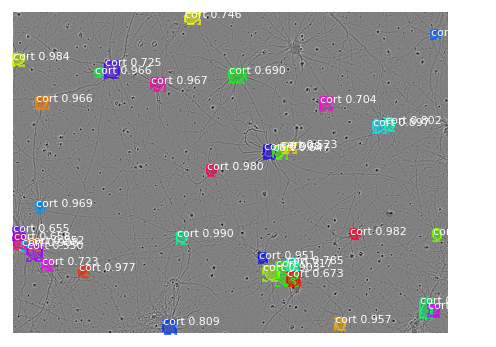

In [411]:
#random input
image, img_name, img_id, img_subset, img_cell_type, img_annotation, \
                                    img_nb_cells, array_true_multimasks \
 = generate_random_image(df_img, df_train, df_val, subset='train',
                                                    cell_type='cort')
# Run detection
results = my_model_inf0.detect([np.array(image)], verbose=0)
# Visualize results
r = results[0]
visualize.display_instances(np.array(image), r['rois'], r['masks'], 
                            r['class_ids'], CELL_CLASS_NAMES, r['scores'],
                            figsize=(8, 8))

NB_inst_pred: 35 _  pred_cell_types: cort 



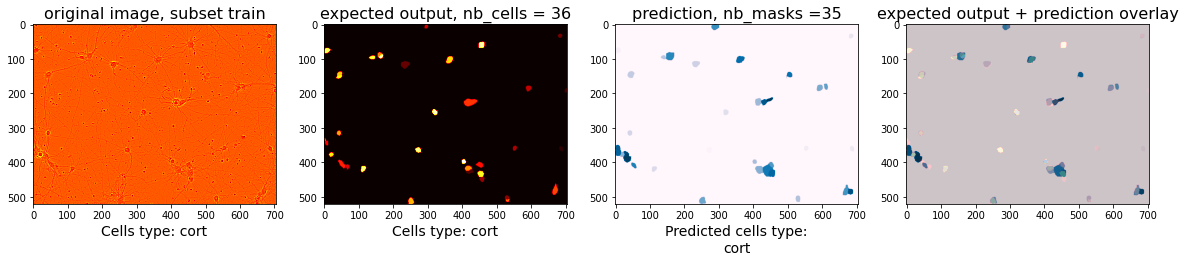

In [412]:
NB_inst_pred, array_pred_multimasks, pred_cell_types = get_ouput_info(results)
plot_results(Image.open(os.path.join(DIR_IMG_TRAINING, img_name)), 'hot',
                            img_subset, array_true_multimasks, 
                            array_pred_multimasks, img_cell_type, 
                            pred_cell_types, img_nb_cells, NB_inst_pred)

NB_inst_pred: 35 _  pred_cell_types: cort 



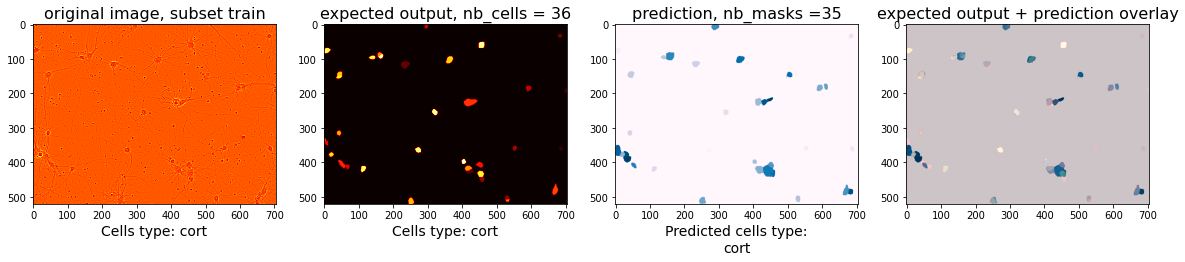

In [440]:
_, array_pred_multimasks_woo, _ = get_ouput_info(results, remove_overlap=True)
plot_results(Image.open(os.path.join(DIR_IMG_TRAINING, img_name)), 'hot',
                            img_subset, array_true_multimasks, 
                            array_pred_multimasks_woo, img_cell_type, 
                            pred_cell_types, img_nb_cells, NB_inst_pred)

#identical graphs when we remove overlap

In [413]:
#IOU score for one image
iou_map([array_true_multimasks], [array_pred_multimasks], verbose=1);

Thresh	TP	FP	FN	Prec.
0.500	21	14	15	0.420
0.550	20	15	16	0.392
0.600	18	17	18	0.340
0.650	18	17	18	0.340
0.700	16	19	20	0.291
0.750	12	23	24	0.203
0.800	6	29	30	0.092
0.850	3	32	33	0.044
0.900	0	35	36	0.000
0.950	0	35	36	0.000
Average Precision (AP)
AP	-	-	-	0.212


In [441]:
#IOU score for one image, when overlap is removed
iou_map([array_true_multimasks], [array_pred_multimasks_woo], verbose=1);

Thresh	TP	FP	FN	Prec.
0.500	20	15	16	0.392
0.550	19	16	17	0.365
0.600	17	18	19	0.315
0.650	17	18	19	0.315
0.700	16	19	20	0.291
0.750	13	22	23	0.224
0.800	7	28	29	0.109
0.850	3	32	33	0.044
0.900	0	35	36	0.000
0.950	0	35	36	0.000
Average Precision (AP)
AP	-	-	-	0.206



**Test 2: random image from training set, astro cell**

image id: 96b7471ba87d _ subset: train _ cell type: astro 



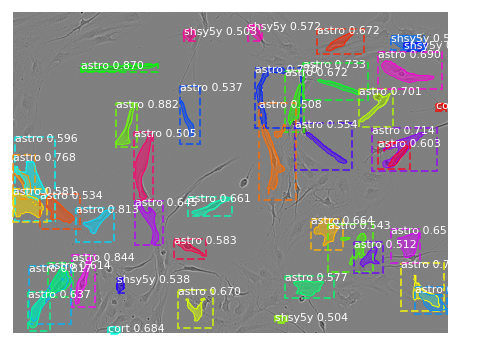

In [108]:
#random input
image, img_name, img_id, img_subset, img_cell_type, img_annotation, \
                                img_nb_cells, array_true_multimasks \
    = generate_random_image(df_img, df_train, df_val, subset='train',
                                                    cell_type='astro')
# Run detection
results = my_model_inf0.detect([np.array(image)], verbose=0)
# Visualize results
r = results[0]
visualize.display_instances(np.array(image), r['rois'], r['masks'], 
                            r['class_ids'], CELL_CLASS_NAMES, r['scores'],
                            figsize=(8, 8))

NB_inst_pred: 42 _  pred_cell_types: astro, cort, shsy5y 



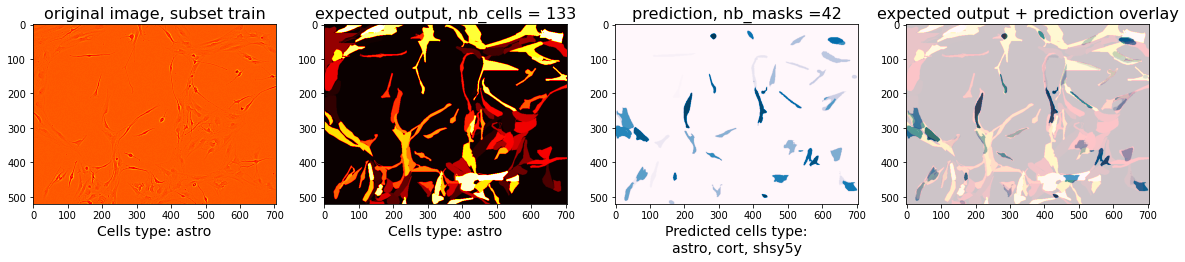

In [109]:
NB_inst_pred, array_pred_multimasks, pred_cell_types = get_ouput_info(results)
plot_results(Image.open(os.path.join(DIR_IMG_TRAINING, img_name)), 'hot',
                            img_subset, array_true_multimasks, array_pred_multimasks, img_cell_type, 
                            pred_cell_types, img_nb_cells, NB_inst_pred)

In [110]:
#IOU & AP score for one image
iou_map([array_true_multimasks], [array_pred_multimasks], verbose=1);

Thresh	TP	FP	FN	Prec.
0.500	11	31	122	0.067
0.550	7	35	126	0.042
0.600	7	35	126	0.042
0.650	6	36	127	0.036
0.700	6	36	127	0.036
0.750	3	39	130	0.017
0.800	0	42	133	0.000
0.850	0	42	133	0.000
0.900	0	42	133	0.000
0.950	0	42	133	0.000
Average Precision (AP)
AP	-	-	-	0.024


In [111]:
_, array_pred_multimasks_woo, _ = get_ouput_info(results, remove_overlap=True)
#AP score for one image, when overlap is removed
iou_map([array_true_multimasks], [array_pred_multimasks_woo], verbose=1);

NB_inst_pred: 42 _  pred_cell_types: astro, cort, shsy5y 

Thresh	TP	FP	FN	Prec.
0.500	10	32	123	0.061
0.550	8	34	125	0.048
0.600	8	34	125	0.048
0.650	7	35	126	0.042
0.700	6	36	127	0.036
0.750	3	39	130	0.017
0.800	0	42	133	0.000
0.850	0	42	133	0.000
0.900	0	42	133	0.000
0.950	0	42	133	0.000
Average Precision (AP)
AP	-	-	-	0.025



**Test 3: random image from training set, shsy5y cell**

image id: 446cf8ba65e5 _ subset: train _ cell type: shsy5y 



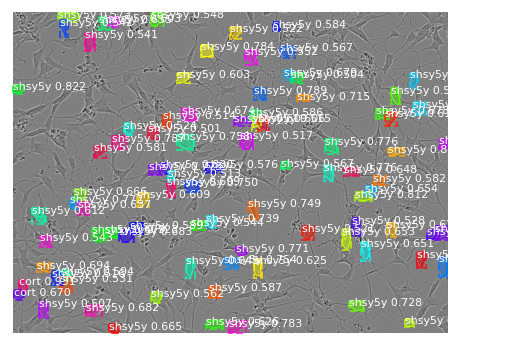

In [445]:
#random input
image, img_name, img_id, img_subset, img_cell_type, img_annotation, \
                                            img_nb_cells, array_true_multimasks \
    = generate_random_image(df_img, df_train, df_val, subset='train',
                                                    cell_type='shsy5y')
# Run detection
results = my_model_inf0.detect([np.array(image)], verbose=0)
# Visualize results
r = results[0]
visualize.display_instances(np.array(image), r['rois'], r['masks'], 
                            r['class_ids'], CELL_CLASS_NAMES, r['scores'],
                            figsize=(8, 8))

NB_inst_pred: 90 _  pred_cell_types: cort, shsy5y 



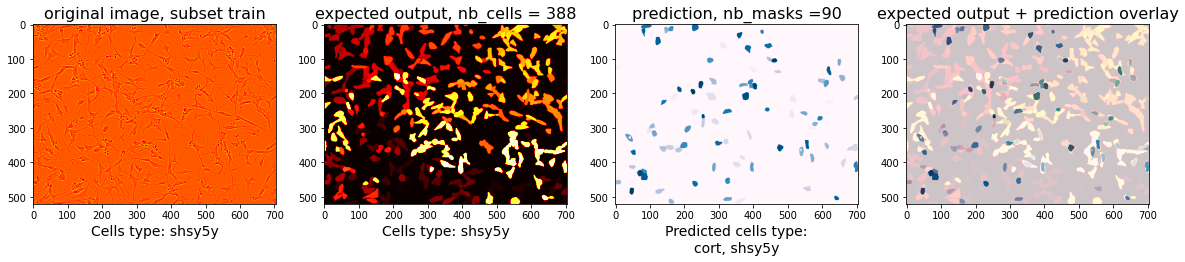

In [446]:
NB_inst_pred, array_pred_multimasks, pred_cell_types = get_ouput_info(results)
plot_results(Image.open(os.path.join(DIR_IMG_TRAINING, img_name)), 'hot',
                            img_subset, array_true_multimasks, array_pred_multimasks, img_cell_type, 
                            pred_cell_types, img_nb_cells, NB_inst_pred)

In [447]:
#IOU score for one image
iou_map([array_true_multimasks], [array_pred_multimasks], verbose=1);

Thresh	TP	FP	FN	Prec.
0.500	63	27	324	0.152
0.550	56	34	331	0.133
0.600	49	41	338	0.114
0.650	44	46	343	0.102
0.700	33	57	354	0.074
0.750	19	71	368	0.041
0.800	10	80	377	0.021
0.850	4	86	383	0.008
0.900	1	89	386	0.002
0.950	0	90	387	0.000
Average Precision (AP)
AP	-	-	-	0.065


In [448]:
_, array_pred_multimasks_woo, _ = get_ouput_info(results, remove_overlap=True)
#AP score for one image, when overlap is removed
iou_map([array_true_multimasks], [array_pred_multimasks_woo], verbose=1);

NB_inst_pred: 90 _  pred_cell_types: cort, shsy5y 

Thresh	TP	FP	FN	Prec.
0.500	62	28	325	0.149
0.550	56	34	331	0.133
0.600	47	43	340	0.109
0.650	44	46	343	0.102
0.700	33	57	354	0.074
0.750	19	71	368	0.041
0.800	10	80	377	0.021
0.850	3	87	384	0.006
0.900	1	89	386	0.002
0.950	0	90	387	0.000
Average Precision (AP)
AP	-	-	-	0.064



**Test 4: random image from validation set**

image id: de35454a3346 _ subset: val _ cell type: shsy5y 



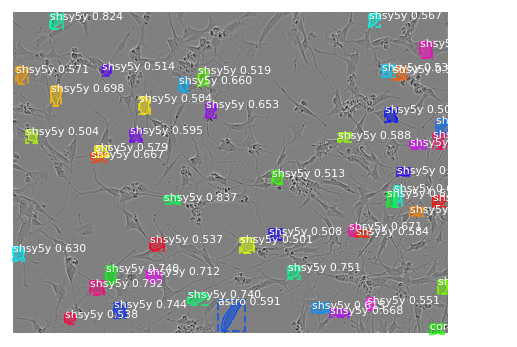

In [449]:
#random input
image, img_name, img_id, img_subset, img_cell_type, img_annotation, \
                                            img_nb_cells, array_true_multimasks \
    = generate_random_image(df_img, df_train, df_val, subset='val')
# Run detection
results = my_model_inf0.detect([np.array(image)], verbose=0)
# Visualize results
r = results[0]
visualize.display_instances(np.array(image), r['rois'], r['masks'], 
                            r['class_ids'], CELL_CLASS_NAMES, r['scores'],
                            figsize=(8, 8))

NB_inst_pred: 47 _  pred_cell_types: shsy5y, astro, cort 



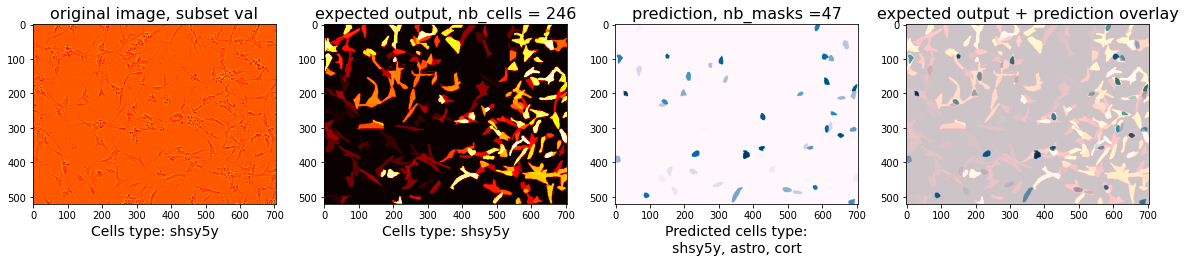

In [450]:
NB_inst_pred, array_pred_multimasks, pred_cell_types = get_ouput_info(results)
plot_results(Image.open(os.path.join(DIR_IMG_TRAINING, img_name)), 'hot',
                            img_subset, array_true_multimasks, array_pred_multimasks, img_cell_type, 
                            pred_cell_types, img_nb_cells, NB_inst_pred)

In [451]:
#IOU score for one image
iou_map([array_true_multimasks], [array_pred_multimasks], verbose=1);

Thresh	TP	FP	FN	Prec.
0.500	18	29	228	0.065
0.550	15	32	231	0.054
0.600	9	38	237	0.032
0.650	5	42	241	0.017
0.700	4	43	242	0.014
0.750	1	46	245	0.003
0.800	1	46	245	0.003
0.850	0	47	246	0.000
0.900	0	47	246	0.000
0.950	0	47	246	0.000
Average Precision (AP)
AP	-	-	-	0.019


In [452]:
_, array_pred_multimasks_woo, _ = get_ouput_info(results, remove_overlap=True)
#AP score for one image, when overlap is removed
iou_map([array_true_multimasks], [array_pred_multimasks_woo], verbose=1);

NB_inst_pred: 47 _  pred_cell_types: shsy5y, astro, cort 

Thresh	TP	FP	FN	Prec.
0.500	18	29	228	0.065
0.550	15	32	231	0.054
0.600	9	38	237	0.032
0.650	5	42	241	0.017
0.700	4	43	242	0.014
0.750	1	46	245	0.003
0.800	1	46	245	0.003
0.850	0	47	246	0.000
0.900	0	47	246	0.000
0.950	0	47	246	0.000
Average Precision (AP)
AP	-	-	-	0.019
